In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [83]:
train_data=pd.read_csv("train.csv")

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Pclass       800 non-null    int64  
 2   Sex          800 non-null    object 
 3   Age          800 non-null    float64
 4   SibSp        800 non-null    int64  
 5   Parch        800 non-null    int64  
 6   Fare         800 non-null    float64
 7   Embarked     800 non-null    object 
 8   Cabin        231 non-null    object 
 9   Ticket       800 non-null    object 
 10  Survived     800 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 68.9+ KB


In [85]:
summary_stats = train_data.describe()
summary_stats

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,2.286250,31.227224,2.506250,2.427500,127.170106,0.24000
std,231.0844,0.807853,13.786282,1.708394,1.730169,69.868913,0.42735
min,1.0000,1.000000,0.500000,0.000000,0.000000,5.769522,0.00000
25%,200.7500,2.000000,21.557119,1.000000,1.000000,66.722253,0.00000
50%,400.5000,3.000000,30.943924,3.000000,2.000000,129.143060,0.00000
75%,600.2500,3.000000,40.264793,4.000000,4.000000,188.230628,0.00000
max,800.0000,3.000000,74.703506,5.000000,5.000000,249.417591,1.00000


In [86]:
train_data.isnull()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Ticket,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
795,False,False,False,False,False,False,False,False,True,False,False
796,False,False,False,False,False,False,False,False,True,False,False
797,False,False,False,False,False,False,False,False,True,False,False
798,False,False,False,False,False,False,False,False,True,False,False


In [87]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Cabin          569
Ticket           0
Survived         0
dtype: int64


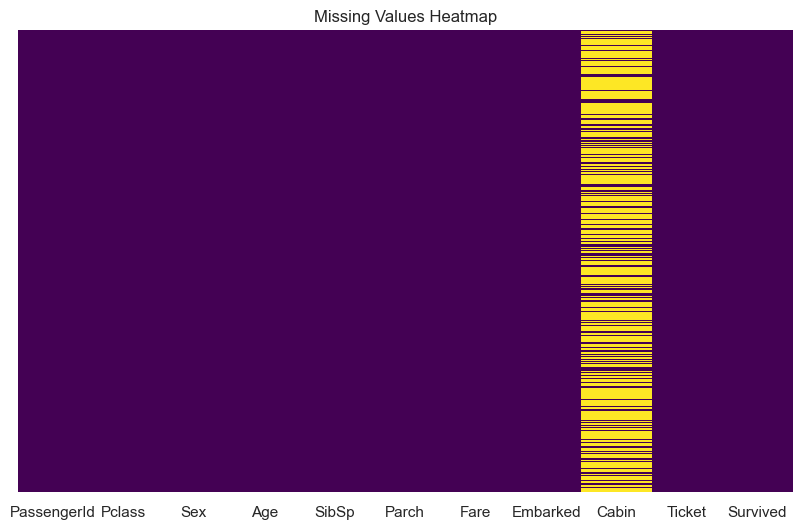

In [88]:

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [89]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)
missing_values_after_handling = train_data.isnull().sum()
print("Missing Values after Handling:\n", missing_values_after_handling)

Missing Values after Handling:
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Ticket         0
Survived       0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14068\1969186222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14068\1969186222.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [90]:
survival_percentage = (train_data['Survived'].sum() / len(train_data)) * 100

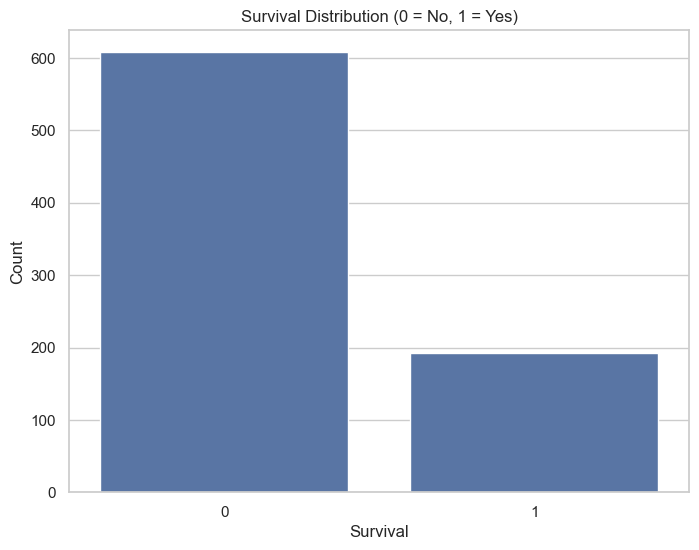

In [91]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

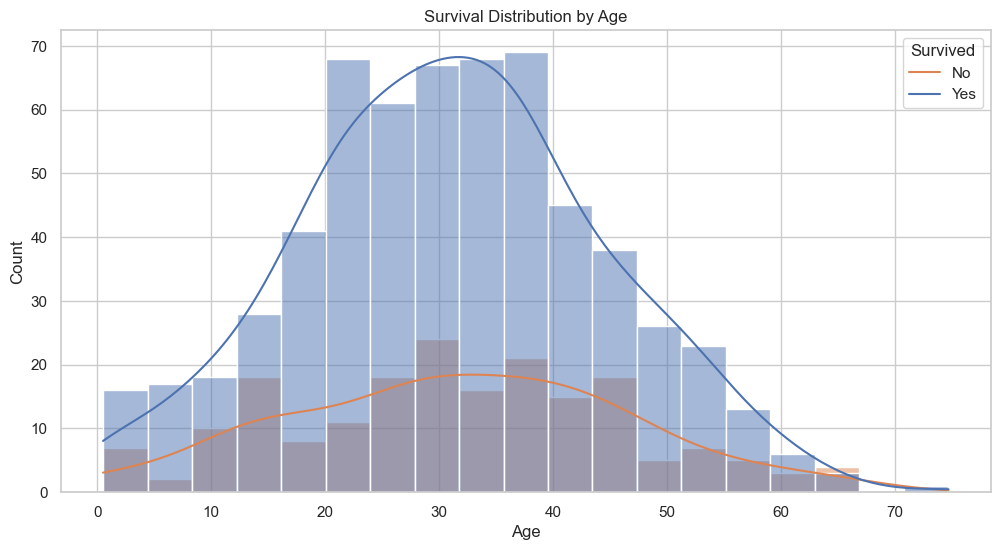

In [92]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True) # using Kernel Density Estimation
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

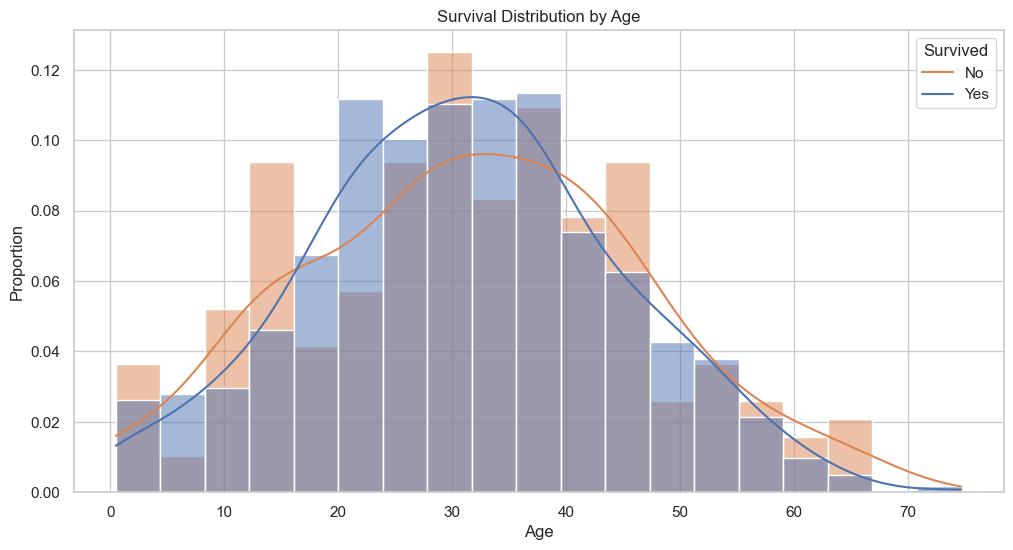

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, stat='probability', common_norm=False)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

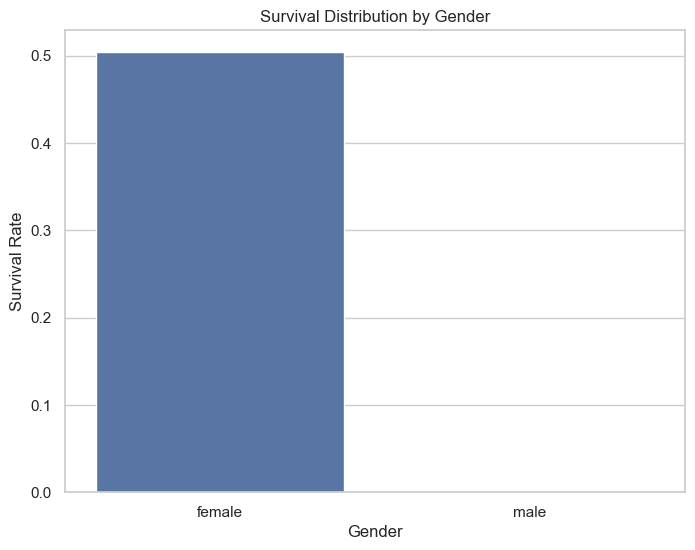

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, errorbar=None)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

In [95]:
train_data_copy = train_data.copy()

In [96]:
train_data_copy['Survived'] = train_data_copy['Survived'].astype(str)

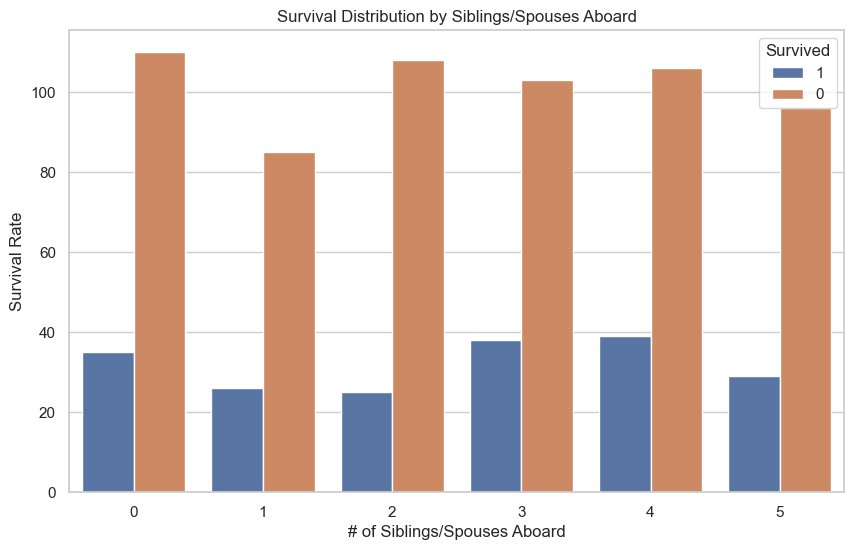

In [97]:

plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Siblings/Spouses Aboard')
plt.xlabel('# of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

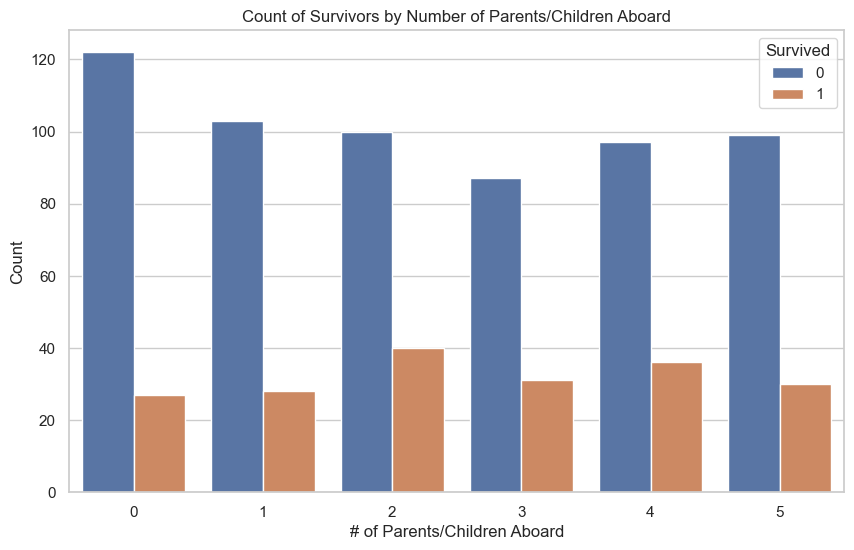

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data_copy)
plt.title('Count of Survivors by Number of Parents/Children Aboard')
plt.xlabel('# of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

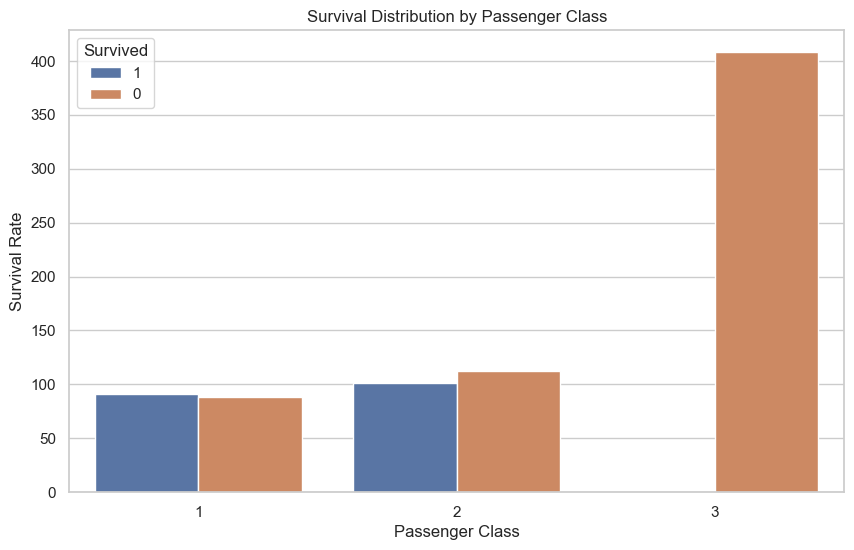

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

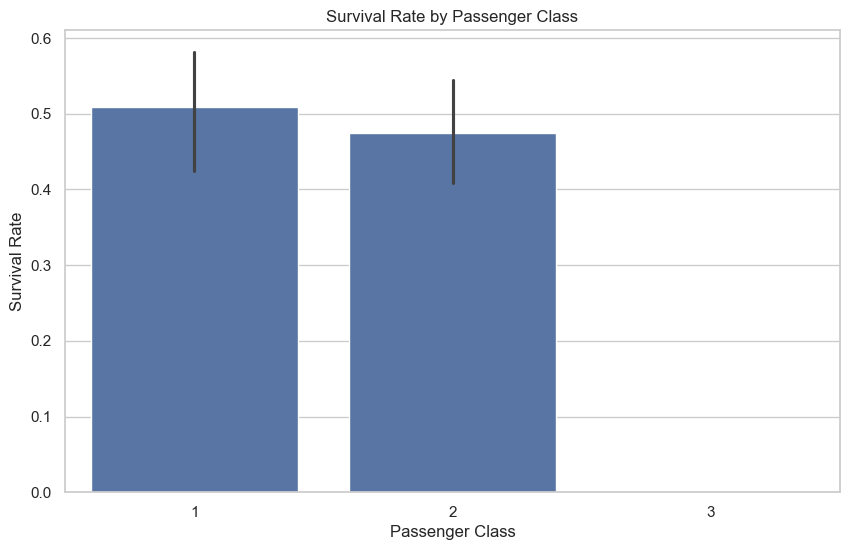

In [100]:
train_data['Survived'] = train_data['Survived'].astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [101]:
average_fare = train_data.groupby('Survived')['Fare'].mean()
print("Average Fare for Non-Survivors:", average_fare[0])
print("Average Fare for Survivors:", average_fare[1])

Average Fare for Non-Survivors: 127.77871869085605
Average Fare for Survivors: 125.2428307547562


In [102]:
embarked_survival = pd.crosstab(train_data['Embarked'], train_data['Survived'], margins=True, margins_name='Total')
embarked_survival

Survived,0,1,Total
Embarked,,,
C,126,40,166
Q,61,16,77
S,421,136,557
Total,608,192,800


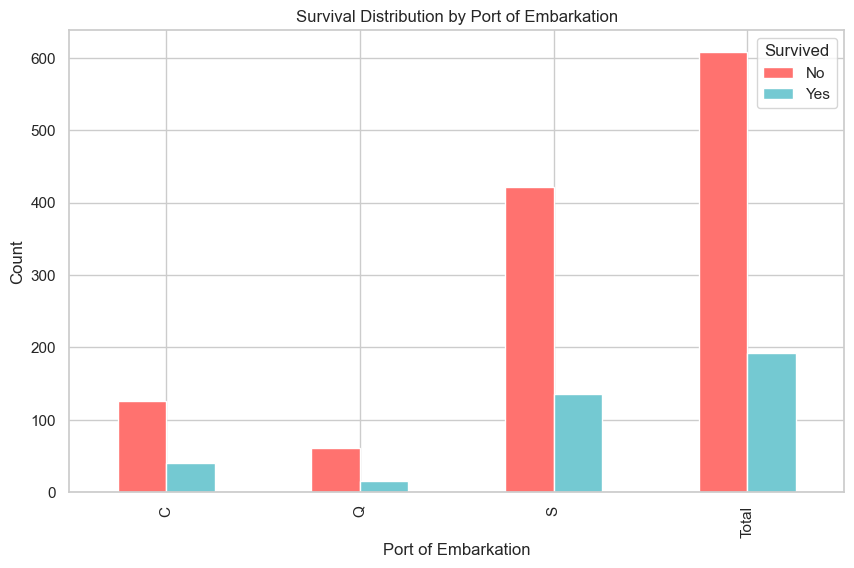

In [103]:
embarked_survival.drop('Total', axis=1, inplace=True)  
embarked_survival.plot(kind='bar', color=['#FF726F', '#74C9D2'], figsize=(10, 6))
plt.title('Survival Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [104]:
embarked_survival_rate = pd.crosstab(index=train_data['Embarked'], columns=train_data['Survived'], normalize='index') * 100
embarked_survival_rate

Survived,0,1
Embarked,,
C,75.903614,24.096386
Q,79.220779,20.779221
S,75.583483,24.416517


In [105]:
test_data = pd.read_csv('test.csv')

In [106]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Ticket
0,1,2,male,32.452449,1,2,142.285425,S,NaN,A/5 21171
1,2,3,male,16.486131,5,3,183.510713,C,NaN,STON/O2. 3101282
2,3,2,female,28.997831,5,5,91.937202,S,NaN,A/5 21171
3,4,1,male,45.842098,5,0,155.107664,C,NaN,113803
4,5,2,male,7.466706,1,2,148.416979,Q,NaN,STON/O2. 3101282


In [107]:
train_data = train_data.drop(['PassengerId', 'Ticket'], axis=1)

In [108]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [109]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = MinMaxScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

In [110]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
}

In [112]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [113]:
grid_rf = GridSearchCV(rf, param_grid['RandomForest'], cv=5)
grid_rf.fit(X_train, y_train)

grid_gb = GridSearchCV(gb, param_grid['GradientBoosting'], cv=5)
grid_gb.fit(X_train, y_train)

grid_svm = GridSearchCV(svm, param_grid['SVM'], cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [114]:
print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best accuracy:", grid_rf.best_score_)

print("Gradient Boosting - Best parameters:", grid_gb.best_params_)
print("Gradient Boosting - Best accuracy:", grid_gb.best_score_)

print("SVM - Best parameters:", grid_svm.best_params_)
print("SVM - Best accuracy:", grid_svm.best_score_)

Random Forest - Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Best accuracy: 1.0
Gradient Boosting - Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting - Best accuracy: 1.0
SVM - Best parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
SVM - Best accuracy: 1.0


In [115]:
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42 
)

In [116]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [ ]:
most_common_embarked_test = test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna(most_common_embarked_test, inplace=True)

test_data = test_data.drop(['PassengerId', 'Ticket'], axis=1)
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_data[numerical_cols] = scaler.fit_transform(test_data[numerical_cols])

In [ ]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [117]:
y_pred = best_rf_model.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [130]:
test_data_processed = pd.get_dummies(test_data)

# match columns with trained model
test_data_processed = test_data_processed.reindex(columns=X_train.columns, fill_value=0)

new_prediction = best_rf_model.predict(test_data_processed)

new_prediciton = best_rf_model.predict(test_data)

In [131]:
test_data['Survived_prediciton'] = new_prediciton
test_data

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
0,0.531310,0.2,0.4,0.561481,True,False,True,False,True,0
1,0.265820,1.0,0.6,0.730304,False,True,True,False,False,0
2,0.473866,1.0,1.0,0.355299,True,False,False,False,True,1
3,0.753955,1.0,0.0,0.613990,False,False,True,False,False,0
4,0.115843,0.2,0.4,0.586591,True,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...
295,0.482953,0.4,0.6,0.942926,False,True,True,False,True,0
296,0.272531,1.0,0.4,0.908219,False,False,False,False,True,1
297,0.214939,0.2,0.2,0.567960,False,True,True,False,True,0
298,0.470776,0.8,0.0,0.354876,True,False,True,False,True,0


In [132]:
test_data[test_data['Survived_prediciton'] == 1]

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
2,0.473866,1.0,1.0,0.355299,True,False,False,False,True,1
6,0.067883,0.0,0.4,0.641881,True,False,False,False,True,1
14,0.702799,0.0,0.6,0.790929,True,False,False,False,True,1
18,0.317155,0.0,0.6,0.191788,True,False,False,False,True,1
19,0.413621,0.4,1.0,0.060700,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...
278,0.603708,0.6,1.0,0.037226,True,False,False,False,False,1
284,0.508400,0.0,0.8,0.721118,False,False,False,False,True,1
287,0.394063,0.6,1.0,0.020259,False,False,False,False,False,1
291,0.246504,0.6,0.0,0.432215,True,False,False,False,True,1
